In [1]:
import numpy as np    
import pandas as pd    
import matplotlib.pyplot as plt  
import os  
import cartopy.crs as ccrs  
import cartopy.feature as cfeature  
import matplotlib.ticker as mticker  
from matplotlib.ticker import MultipleLocator, FuncFormatter
import matplotlib.colors as mcolors  
import gsw
import xarray as xr

In [2]:
df_0 = pd.read_excel(r'D:\ze_1112\最新数据\NORC2022-09_Chl-a+营养盐_20240422更新_绘图使用数据.xls')
# df.dropna(inplace=True)
df_0 = df_0.rename(columns={'站位':'站位名'})
df_0

,站位名,水深（m）,叶绿素浓度（μg/L）,NH4+-N (μmol/L),NO3-N (μmol/L),NO2-N (μmol/L),PO4-P (μmol/L),SiO4-Si (μmol/L)
0,QB08,5,0.032143,0.03,0.0703,0.0267,0.1073,1.2367
1,QB08,75,0.068734,未检出,0.1103,0.0067,0.1083,1.2567
2,QB08,150,NaN,未检出,0.7503,0.0567,0.1643,1.5367
3,QB08,700,NaN,未检出,35.48333,0.02,2.31,72.4100
4,QB08,1000,NaN,未检出,38.73333,0.02,2.51,104.7600
...,...,...,...,...,...,...,...,...
493,N21-10,1000,NaN,未检出,38.24333,0.02,2.58,114.5600
494,N21-10,2000,NaN,未检出,38.24333,0.02,2.51,139.5000
495,N21-10,3000,NaN,未检出,37.68333,0.02,2.5,140.1100
496,N21-10,4000,NaN,未检出,36.28333,0.03,2.32,137.5900


In [3]:
stations = []
for i in df_0['站位名']:
    stations.append(i)
stations = list(set(stations))
print(stations)

['E163-05', 'N21-13', 'QB04', 'QB06', 'QB07', 'E163-04', 'N03-03', 'E140-08', 'E140-07', 'E130-10', 'E130-04', 'E163-03', 'E130-03', 'E163-04s', 'N21-14', 'E163-06s', 'E163-07', 'E130-05', 'E130-02', 'E130-13', 'E140-03orQB01', 'N03-04', 'N21-10', 'QB08', 'E130-09', 'E130-06', 'N03-02', 'N21-11', 'E163-01', 'QB03', 'E130-08', 'E163-02', 'FB01', 'E130-12', 'E130-11', 'N21-12', 'E130-07', 'E140-11', 'E130-14', 'E163-06']


In [4]:
def dms_to_decimal(dms):
    """将度分秒转换为十进制度数"""
    dms = dms.replace('°', ' ').replace('′', ' ').replace('″', ' ').replace('"E', ' ').replace('"N', ' ').replace('"S', ' ')
    parts = dms.split()
    degrees = float(parts[0])
    minutes = float(parts[1]) if len(parts) > 1 else 0
    seconds = float(parts[2]) if len(parts) > 2 else 0
    decimal = degrees + (minutes / 60) + (seconds / 3600)
    return decimal

In [5]:
stations_ctd = os.listdir(r'D:\ze_1112\最新数据\CTD补上溶解氧_04共享航次计划调查资料汇交表')
lonlat = []  
for i in stations_ctd:
    if i.endswith('.xls'):
        df = pd.read_excel(r'D:\ze_1112\最新数据\CTD补上溶解氧_04共享航次计划调查资料汇交表\%s' % i, skiprows=1, header=1)
        df = df.drop(0)
        longitude = df['经度'].apply(dms_to_decimal).values # type: ignore
        latitude = df['纬度'].apply(dms_to_decimal).values  # type: ignore
        name = df['站位名'].values
        lonlat.append((longitude[3], latitude[3], name[3]))
lonlat = pd.DataFrame(lonlat, columns=['lon', 'lat', '站位名'])
data_path = pd.merge( lonlat, df_0, on='站位名')

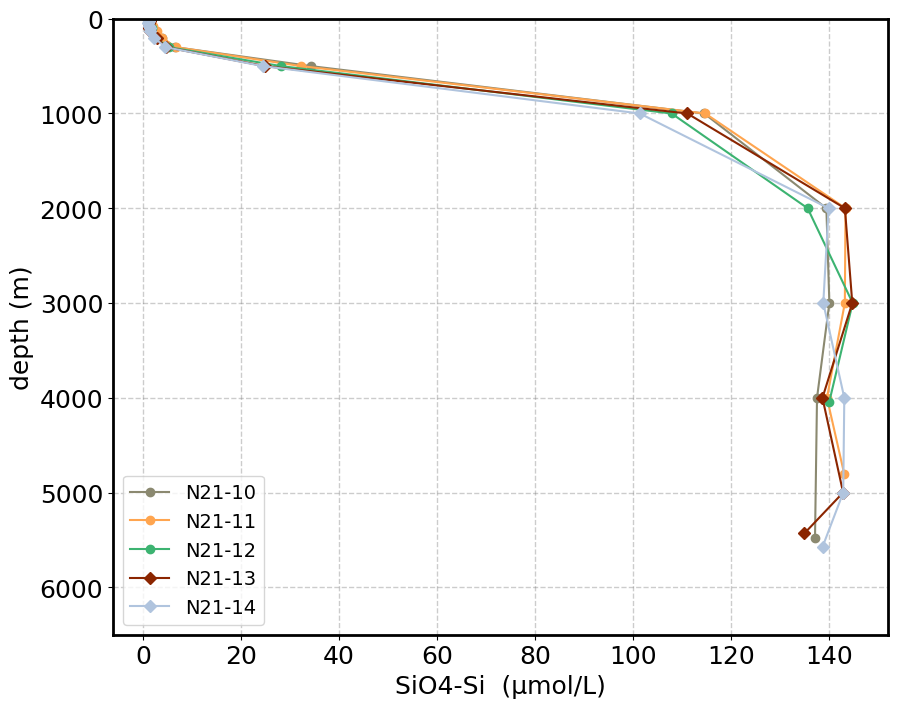

In [7]:
# 选数据范围
df = data_path[394:465]

plt.rcParams['font.size'] = 18
all_colors = ['#8B8970', '#FFA54F', '#3CB371', '#8B2500', '#B0C4DE', '#0FFFF0', '#8B4513', '#6B8E23', '#F08080', '#008080', '#BC8F8F', '#FFC0CB', '#9932CC', '#F0E68C', '#B22222']
all_markers = ['o','o','o','D','D','D','X','X','X','*','*','*','^','^','^']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_ylabel('depth (m)')
ax.set_xlabel('SiO4-Si  (μmol/L)')
ax.set_ylim(0, 6500)
ax.invert_yaxis()
ax.spines[:].set_linewidth(2)

stations = list(set(df['站位名']))
stations.sort()

for station in stations:
    df_station = df[df['站位名'] == station]
    ax.plot(df_station['SiO4-Si  (μmol/L)'], df_station['水深（m）'], c=all_colors[stations.index(station)], marker=all_markers[stations.index(station)], label=station)
    ax.legend(loc='lower left', fontsize=14)
    ax.grid(True, linestyle='--', linewidth=1, color='gray', alpha=0.4)
plt.savefig('N_21_cross_section.png',bbox_inches='tight', dpi=300)

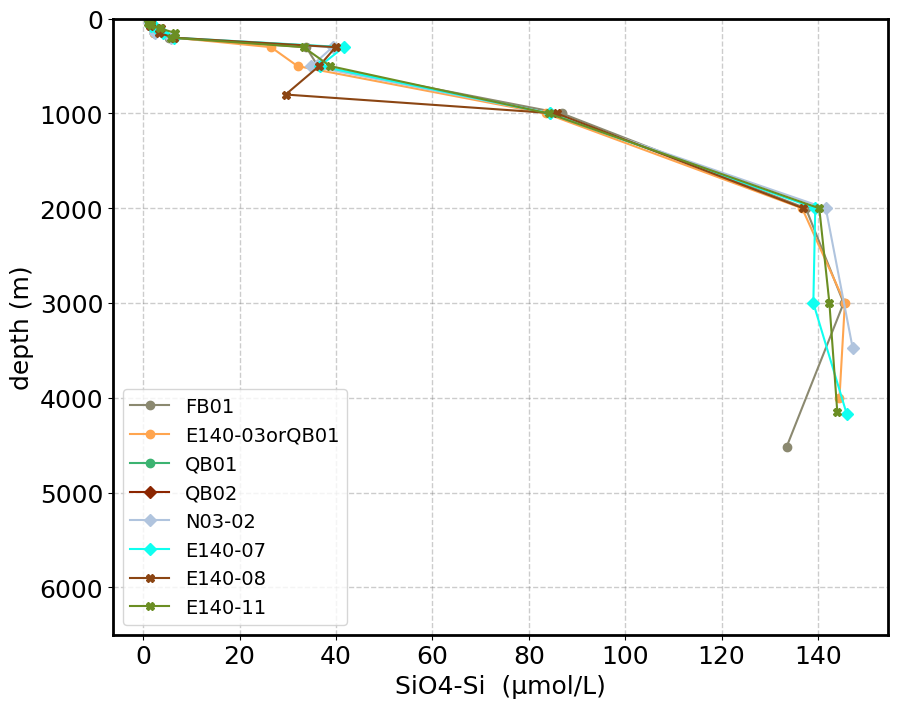

In [16]:
df = data_path

plt.rcParams['font.size'] = 18
all_colors = ['#8B8970', '#FFA54F', '#3CB371', '#8B2500', '#B0C4DE', '#0FFFF0', '#8B4513', '#6B8E23', '#F08080', '#008080', '#BC8F8F', '#FFC0CB', '#9932CC', '#F0E68C', '#B22222']
all_markers = ['o','o','o','D','D','D','X','X','X','*','*','*','^','^','^']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_ylabel('depth (m)')
ax.set_xlabel('SiO4-Si  (μmol/L)')
ax.set_ylim(0,6500)
ax.invert_yaxis()
ax.spines[:].set_linewidth(2)

stations = ['FB01', 'E140-03orQB01', 'QB01', 'QB02', 'N03-02', 'E140-07', 'E140-08', 'E140-11']
# stations = ['QB03', 'N03-03', 'QB04', 'N03-04']


for station in stations:
    df_station = df[df['站位名'] == station]
    ax.plot(df_station['SiO4-Si  (μmol/L)'], df_station['水深（m）'], c=all_colors[stations.index(station)], marker=all_markers[stations.index(station)], label=station)

ax.legend(loc='lower left', fontsize=14)
ax.grid(True, linestyle='--', linewidth=1, color='gray', alpha=0.4)
plt.savefig('West_caroline_cross_section.png', bbox_inches='tight', dpi=300)


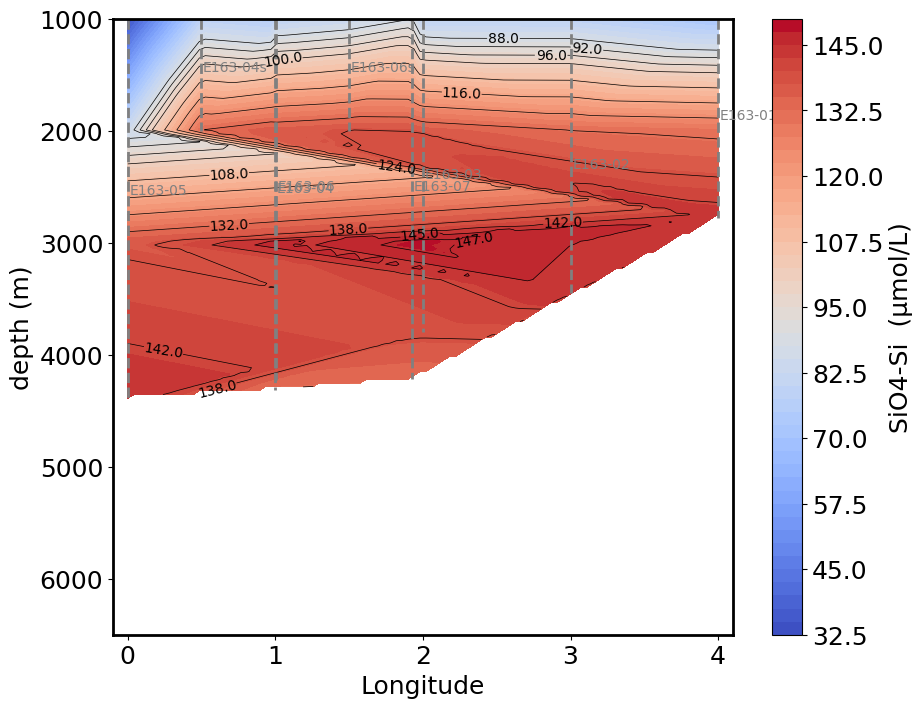

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# 选数据范围
df = data_path[243:357]
df = df[df['水深（m）']>=1000]
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# 设置坐标轴标签
ax.set_ylabel('depth (m)')
ax.set_xlabel('Longitude')
ax.set_ylim(1000, 6500)
ax.set_xlim(-0.1, 4.1)
ax.invert_yaxis()
ax.spines[:].set_linewidth(2)

# 获取经度、深度和 SiO4 浓度数据
longitude = df['lon']
latitude = df['lat']
depth = df['水深（m）']
sio4_concentration = df['SiO4-Si  (μmol/L)']

# 创建网格
xi = np.linspace(latitude.min(), latitude.max(), 100)
yi = np.linspace(depth.min(), depth.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# 插值
from scipy.interpolate import griddata
zi = griddata((latitude, depth), sio4_concentration, (xi, yi), method='linear')

# 绘制等值线填充图
cf = ax.contourf(xi, yi, zi, levels=50, cmap='coolwarm')
cs = ax.contour(xi, yi, zi, levels=[88,92,96,100,108,116,124,132,138,142,145, 147], colors='k', linewidths=0.5)
cl = ax.clabel(cs, inline=1, fontsize=10, fmt='%1.1f')

# 添加颜色条
cbar = fig.colorbar(cf, ax=ax)
cbar.set_label('SiO4-Si  (μmol/L)')

# 绘制站点虚线
stations = df['站位名'].unique()
for station in stations:
    station_data = df[df['站位名'] == station]
    ax.plot(station_data['lat'], station_data['水深（m）'], '--', color='gray', linewidth=2)
    # 标注站点名称
    ax.text(station_data['lat'].mean()+0.011, station_data['水深（m）'].mean(), station, color='grey', fontsize=10, verticalalignment='bottom')
# 添加网格
# ax.grid(True, linestyle='--', linewidth=1, color='gray', alpha=0.4)

plt.savefig('CF_E_163_cross_section.png', bbox_inches='tight', dpi=300)


In [6]:
# 自定义刻度格式化函数
def lon_formatter(x, pos):
    if x < 0:
        return f'{abs(int(x))}°W'
    elif x > 180:
        return f'{360-int(x)}°W'
    else:
        return f'{int(x)}°E'

def lat_formatter(x, pos):
    if x > 0:
        return f'{int(x)}°N' 
    else:
        return f'{int(x)}°S'

In [ ]:
# stations_ctd = os.listdir(r'D:\ze_1112\最新数据\CTD补上溶解氧_04共享航次计划调查资料汇交表')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['font.size'] = 24

    
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())    
ax1.set_extent([125, 165.001, -1, 25.001], crs=ccrs.PlateCarree())

for i in stations:
    df = pd.read_excel(os.path.join(rf'D:\ze_1112\最新数据\CTD补上溶解氧_04共享航次计划调查资料汇交表\CTD-{i}.xls'), skiprows=3, usecols=[1,5,6,8,11,13,16], names=['站位名', '纬度', '经度', '深度', '水温', '盐度', '溶解氧'])
    df = df.drop(0)
    # max_depth = df['深度'].max()
    df = df[(df['深度'] >= 3500) & (df['深度'] <= 4500)]
    longitude = df['经度'].apply(dms_to_decimal).values # type: ignore
    latitude = df['纬度'].apply(dms_to_decimal).values  # type: ignore
    name = df['站位名'].values
    o2 = df['溶解氧'].values
    print(o2)
    depth = df['深度'].values
    
    sc = ax1.scatter(longitude, latitude, s=80, c=o2, cmap='RdYlBu_r', marker='o', alpha=1, edgecolors='k' , transform=ccrs.PlateCarree(), zorder=10, vmin=110, vmax=125)

ax1.spines[:].set_linewidth(2)
ax1.add_feature(cfeature.BORDERS, linewidth=2)
ax1.add_feature(cfeature.COASTLINE, linewidth=2)
ax1.add_feature(cfeature.RIVERS, linewidth=2)
ax1.add_feature(cfeature.LAND, edgecolor='black', zorder=9)

ds = xr.open_dataset(r"E:\all_draw\data\Copernicus_bathy\cmems_mod_glo_phy_my_0.083deg_static_1720691864705.nc")
elevation = ds['deptho'].values
longitude = ds['longitude'].values
latitude = ds['latitude'].values
mask = elevation > 4000
mask_1 = elevation >2000
mask_2 = elevation > 3000
zhe_gai = ax1.contourf(longitude, latitude, mask, levels=[0, 0.5], colors='grey', transform=ccrs.PlateCarree(), alpha=0.2)
zhe_gai_1 = ax1.contourf(longitude, latitude, mask_1, levels=[0, 0.5], colors='orange', transform=ccrs.PlateCarree(), alpha=0.7)
zhe_gai_2 = ax1.contourf(longitude, latitude, mask_2, levels=[0, 0.5], colors='grey', transform=ccrs.PlateCarree(), alpha=0.7)

ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
gl = ax1.gridlines(draw_labels=False, linewidth=1, color='white', alpha=0.15, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}
ax1.set_xticks(np.arange(125, 165.001, 10))
ax1.set_yticks(np.arange(5, 25.001, 5))
ax1.xaxis.set_major_formatter(FuncFormatter(lon_formatter))
ax1.yaxis.set_major_formatter(FuncFormatter(lat_formatter))
    
cbar = plt.colorbar(sc, ax=ax1, orientation='vertical', pad=0.02, aspect=30, shrink=0.65)
cbar.set_label('o2  (μmol/L)', fontsize=18)

# plt.show()    
plt.savefig('2024cruice_o2_scatter_3545m.png', bbox_inches='tight', dpi=300)
plt.close()